## Visualizaciones

## Imports

In [72]:
# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulacion de data
import pandas as pd;

# Directory
import sys
import os

current_dir = os.getcwd()

sys.path.append(os.path.join(current_dir, '..'))

# Helpers
from functions.helpers import *
import geopandas as gpd

## Dataframe

In [73]:
df= pd.read_csv("../data/jobs_ETL.csv")
df.head(3)

,company,level,city,day,month,quarter,industry_1,industry_2,job_function_1,job_function_2
0,Landmark Arabia,Mid-Senior level,Riyadh,Thursday,December,4,Marketing and Advertising,Consumer Goods,Other,NaN
1,Lloyd'S Register Group,Associate,Khobar,Thursday,December,4,Electrical/Electronic Manufacturing,NaN,Accounting/Auditing,Finance
2,Rawabi Holding Co.,Entry level,Dammam,Thursday,December,4,Marketing and Advertising,NaN,Sales,Business Development


## Variables

In [74]:

# Df sin trabajos que no tengan un nivel asociado
df_level_filtrado = df[df['level'] != 'Not Applicable']

#Combinacion dos columnas de industrias
industrias_df = pd.melt(df, id_vars='level', value_vars=['industry_1', 'industry_2'], 
                                   var_name='industry_source', value_name='industry')

industrias_df = industrias_df.dropna(subset=['industry'])

# Top industrias
top_20_industrias = industrias_df['industry'].value_counts().nlargest(20)
top_10_industrias = top_20_industrias.index[:10]
top_12_industrias = top_20_industrias.index[:12]
top_15_industrias = top_20_industrias.index[:16].tolist()
otras_industrias = top_20_industrias.index[10:20]

#Top ciudades
top_15_ciudades = df['city'].value_counts().nlargest(15).index.tolist()
top_9_ciudades = df['city'].value_counts().nlargest(9).index.tolist()

## Figuras

<Axes: title={'center': 'Trabajos por trimestre'}, xlabel='Trabajos', ylabel='Trimestre'>

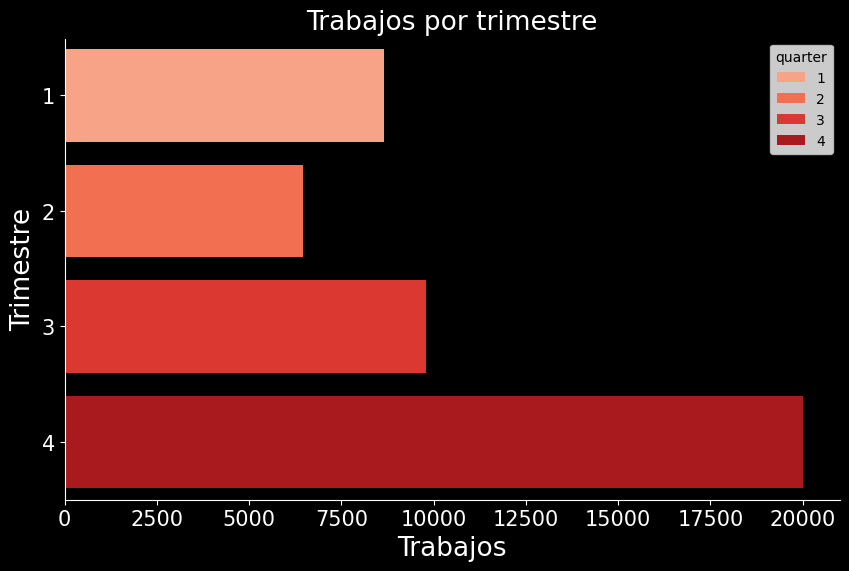

In [75]:
#Cantidad de trabajos publicados por trimestre
# Figura
fig, ax = create_black_plot('Trabajos por trimestre', 'Trabajos', 'Trimestre')

# Plot
custom_palette = sns.color_palette("Reds", 5)[1:]
sns.countplot(data=df, y='quarter', hue='quarter', palette=custom_palette, saturation=0.90, ax=ax)



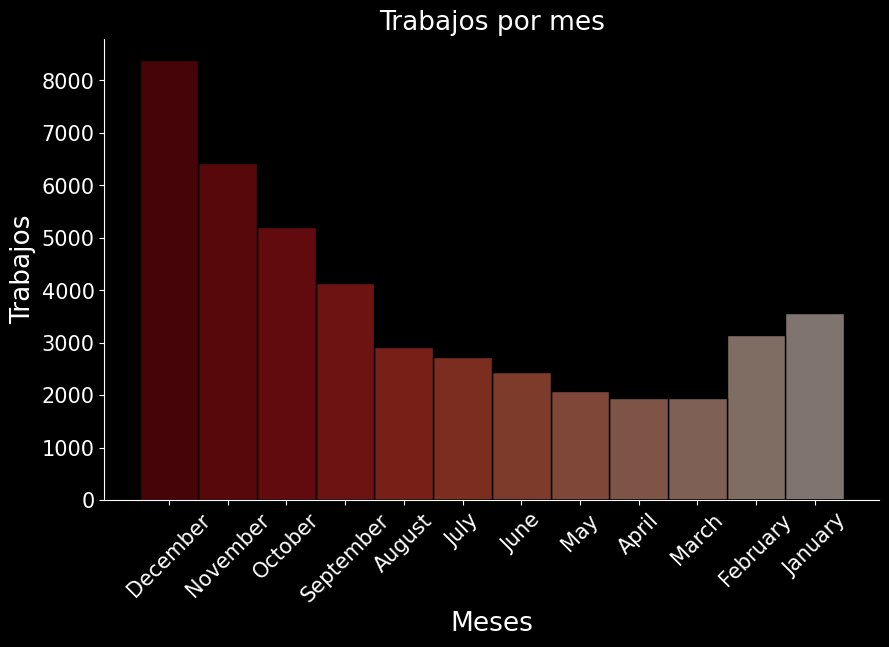

In [76]:
#Trabajos publicados por mes
#Figura
fig, ax = create_black_plot(title='Trabajos por mes', xlabel='Meses', ylabel='Trabajos', rotate = 45)
#Plot
sns.histplot(data=df, x="month",palette="Reds_r", hue="month", ax=ax, legend=False)
ax.set_facecolor('black')
plt.show()

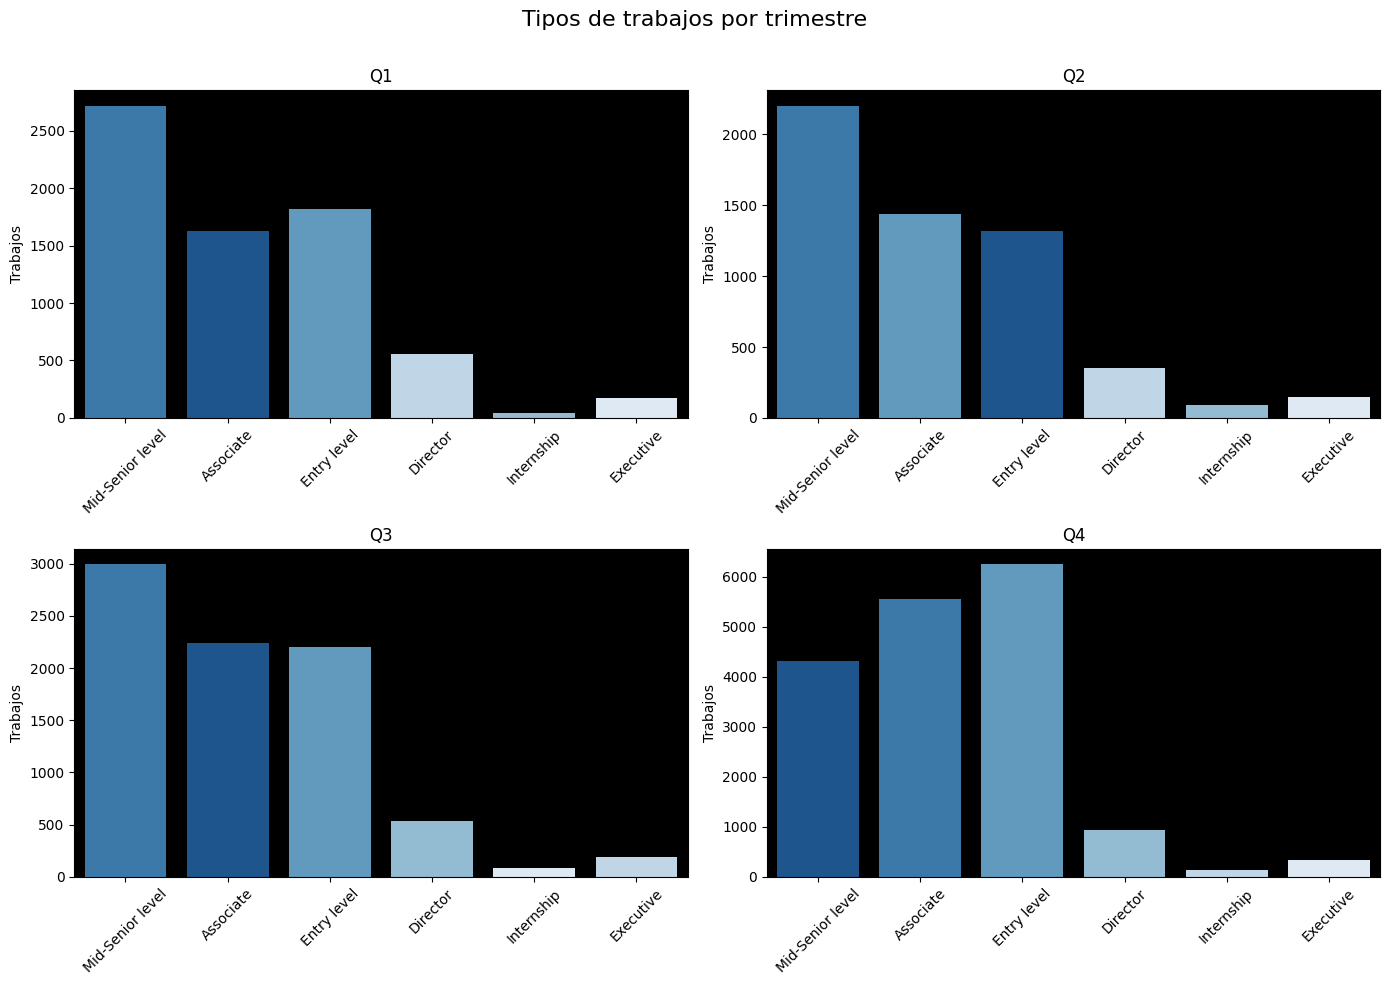

In [77]:

# Figura para 4 plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Tipos de trabajos por trimestre', fontsize=16)


# Lista de trimestre y posiciones
trimestres = [(df_level_filtrado[df_level_filtrado["quarter"] == 1], "Q1", axes[0, 0]),
            (df_level_filtrado[df_level_filtrado["quarter"] == 2], "Q2", axes[0, 1]),
            (df_level_filtrado[df_level_filtrado["quarter"] == 3], "Q3", axes[1, 0]),
            (df_level_filtrado[df_level_filtrado["quarter"] == 4], "Q4", axes[1, 1])]

niveles = df_level_filtrado["level"].dropna().unique()
# Por cada trimestre, hacer un plot
for data, trimestre, ax in trimestres:
    plot_quarter(data, ax, trimestre, niveles)


# Ajustes
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Leave space for the suptitle

# Show the plot
plt.show()

In [78]:
# Ruta al archivo descargado de Natural Earth Data (cambia la ruta según donde lo hayas guardado)
shapefile_path = '../data/ne_10m_admin_0_countries.shp'

# Cargar el shapefile de límites de los países
world = gpd.read_file(shapefile_path)

# Ver las primeras columnas del archivo para identificar cómo podemos filtrar por países
print(world["geometry"])

0      MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1      MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2      MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3      POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...
4      MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
                             ...                        
253    MULTIPOLYGON (((113.5586 22.16303, 113.56943 2...
254    POLYGON ((123.59702 -12.42832, 123.59775 -12.4...
255    POLYGON ((-79.98929 15.79495, -79.98782 15.796...
256    POLYGON ((-78.63707 15.86209, -78.64041 15.864...
257    POLYGON ((117.75389 15.15437, 117.75569 15.151...
Name: geometry, Length: 258, dtype: geometry


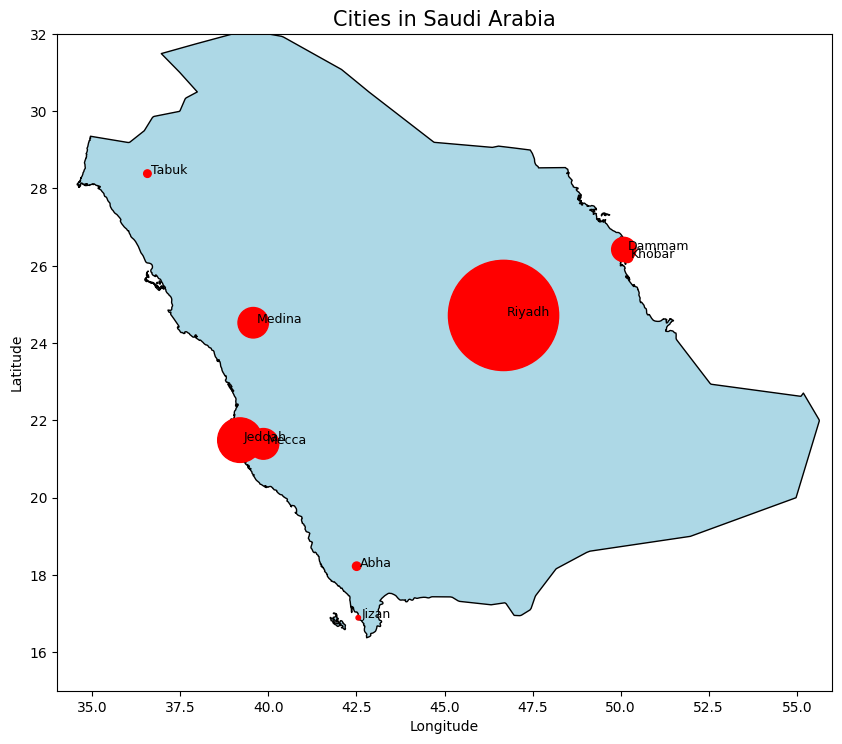

In [79]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ruta al archivo .shp descargado de Natural Earth Data
shapefile_path = '../data/ne_10m_admin_0_countries.shp'

# Cargar el shapefile de límites de los países
world = gpd.read_file(shapefile_path)

# Asegurarse de que la geometría es válida
world = world[world.is_valid]

# Filtrar solo Arabia Saudita usando su nombre en el campo 'ADMIN' (si existe)
# Debemos verificar si la columna 'ADMIN' está disponible
if 'ADMIN' in world.columns:
    saudi_arabia = world[world['ADMIN'] == 'Saudi Arabia']
else:
    raise ValueError("La columna 'ADMIN' no se encuentra en el shapefile.")

# Comprobar si se han extraído geometrías
if saudi_arabia.empty:
    raise ValueError("No se encontró geometría para Arabia Saudita.")

# Diccionario con las coordenadas de las ciudades de Arabia Saudita
coordenadas_ciudades = {
    'Riyadh': (24.7136, 46.6753),
    'Jeddah': (21.4858, 39.1925),
    'Mecca': (21.3891, 39.8579),
    'Medina': (24.5247, 39.5692),
    'Dammam': (26.4207, 50.0888),
    'Khobar': (26.2172, 50.1971),
    'Abha': (18.2233, 42.5053),
    'Tabuk': (28.3839, 36.5662),
    'Jizan': (16.8892, 42.5511)
}

# Crear una lista de latitudes y longitudes para las ciudades
ciudades_lat = [coordenadas_ciudades[city][0] for city in coordenadas_ciudades]
ciudades_lon = [coordenadas_ciudades[city][1] for city in coordenadas_ciudades]

# Filtrar el DataFrame para obtener solo las filas que tienen ciudades en coordenadas_ciudades
filtered_jobs_df = df[df['city'].isin(coordenadas_ciudades.keys())]

# Contar el número de trabajos por ciudad
city_counts = filtered_jobs_df['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

# Crear una lista de tamaños de las ciudades en función del número de trabajos
city_sizes = [count * 0.3 for count in city_counts['count']]  # Escala el tamaño para visualización

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar solo Arabia Saudita
saudi_arabia.plot(ax=ax, color='lightblue', edgecolor='black')

# Añadir puntos de las ciudades en Arabia Saudita
plt.scatter(ciudades_lon, ciudades_lat, c='red', s=city_sizes, zorder=5)

# Añadir etiquetas de las ciudades
for city, (lat, lon) in coordenadas_ciudades.items():
    plt.text(lon + 0.1, lat, city, fontsize=9, zorder=6)

# Limitar el gráfico a las coordenadas de Arabia Saudita
plt.xlim(34, 56)  # Longitud aproximada de Arabia Saudita
plt.ylim(15, 32)  # Latitud aproximada de Arabia Saudita

# Añadir títulos
plt.title("Cities in Saudi Arabia", fontsize=15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Mostrar el gráfico
plt.show()


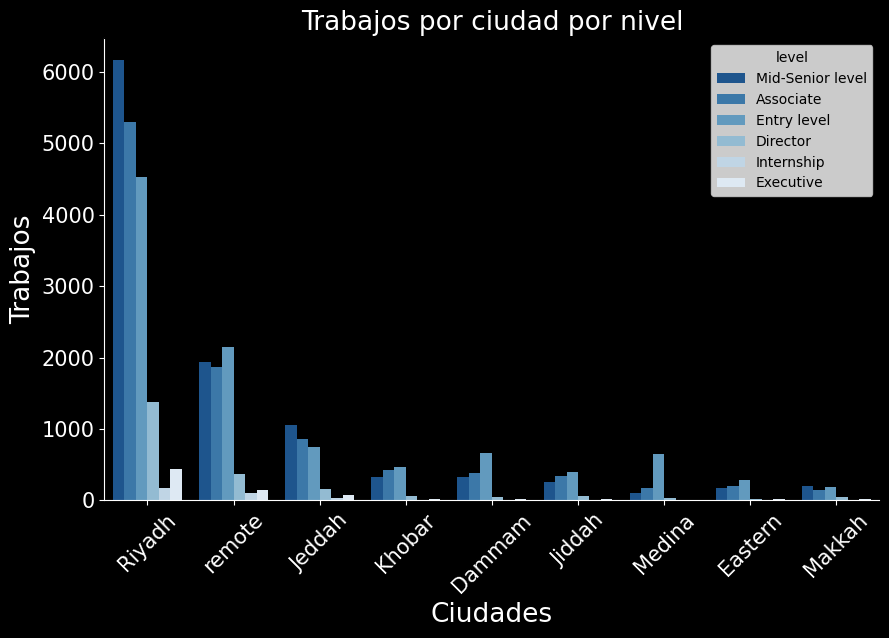

In [80]:
#Trabajos por ciudad, divididos por nivel de trabajo
custom_palette = ['#590d22', '#a4133c', '#ff4d6d', '#ff8fa3', '#ffccd5']
fig, ax = create_black_plot(title='Trabajos por ciudad por nivel', xlabel='Ciudades', ylabel='Trabajos', rotate= 45)
sns.countplot(x='city',hue='level',data=df_level_filtrado,palette="Blues_r",order=top_9_ciudades, ax=ax)
plt.show()

<Axes: title={'center': 'Trabajos por industria'}, xlabel='Trabajos', ylabel='.'>

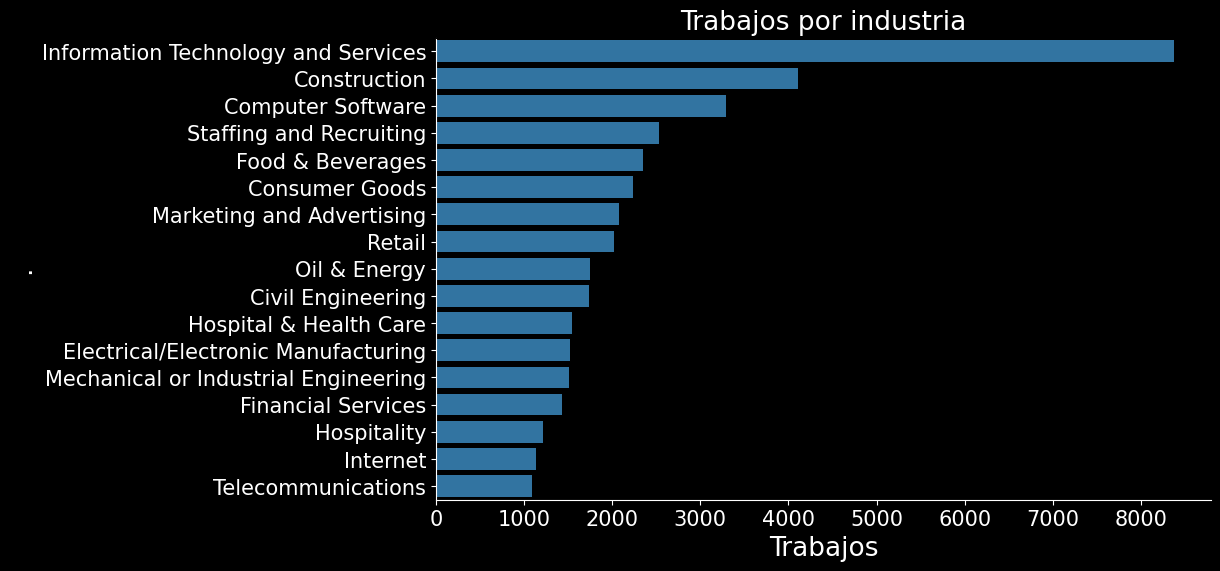

In [81]:
# Trabajos por industria
#Figura
fig, ax = create_black_plot(title='Trabajos por industria', xlabel='Trabajos', ylabel='.')

#Plots
sns.countplot(y='industry',  data=industrias_df, 
               order=industrias_df['industry'].value_counts().nlargest(17).index, ax=ax)

<Axes: title={'center': 'Nivel Trabajos por industria'}, xlabel='Trabajos', ylabel='.'>

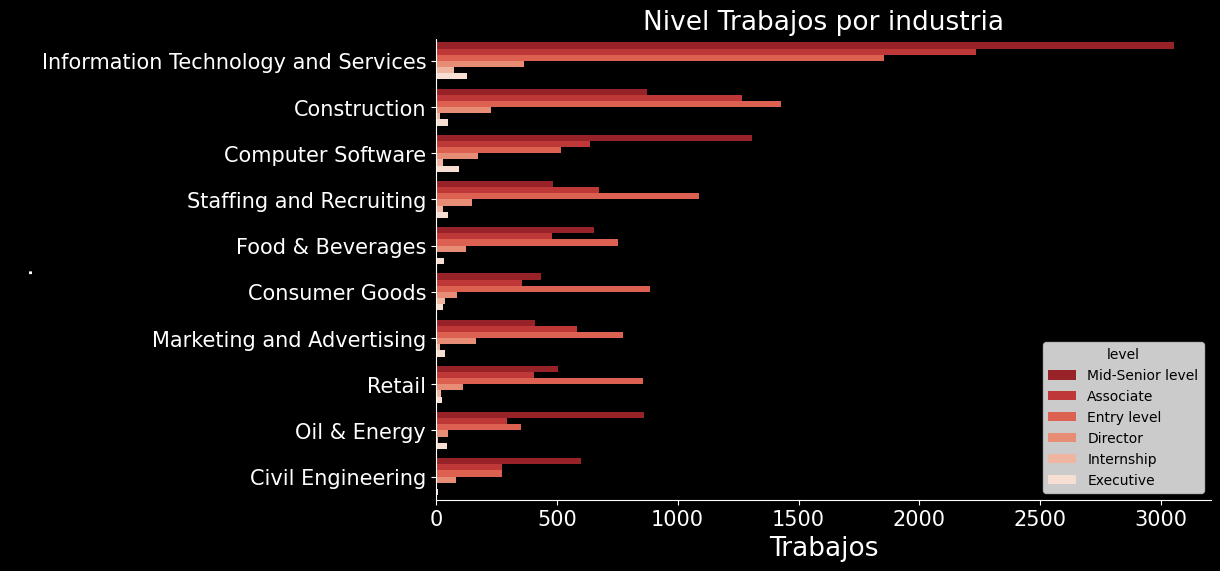

In [82]:
# Tipos de Trabajos por industria
#Eliminamos NaN y trabajos sin tipo de cargo
industrias_df = industrias_df[industrias_df['level'] != 'Not Applicable']

# Figura
fig, ax = create_black_plot(title='Nivel Trabajos por industria', xlabel='Trabajos', ylabel='.')

#Plot
sns.countplot(y='industry', hue='level', data=industrias_df, 
              palette="Reds_r", order=top_10_industrias, ax=ax)

<Axes: title={'center': 'Nivel de Trabajos por industria'}, xlabel='Trabajos', ylabel='.'>

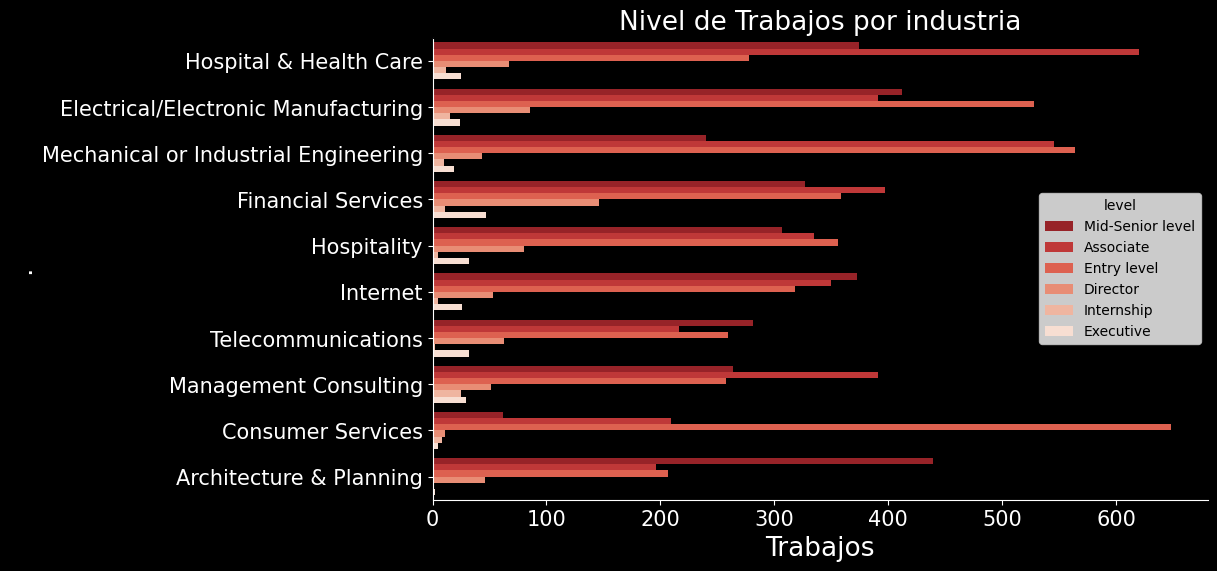

In [83]:
# Tipos de Trabajos por industria
#Figura
fig, ax = create_black_plot(title='Nivel de Trabajos por industria', xlabel='Trabajos', ylabel='.')

#Plot
sns.countplot(y='industry', hue='level', data=industrias_df, 
              palette="Reds_r", order=otras_industrias, ax=ax)

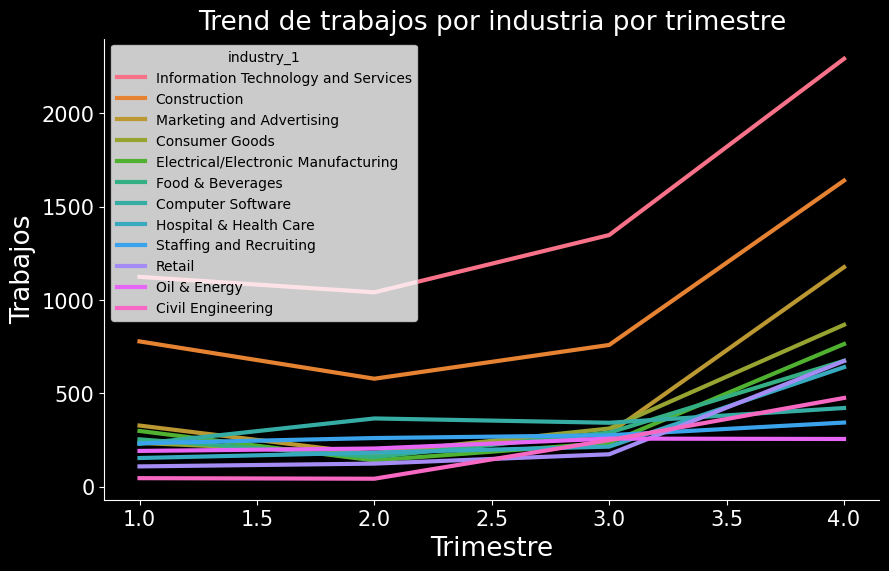

: 

In [85]:
# Trend de trabajos por industria por trimestre
#Filtro solo las industrias mas populares y las agrupo por trimestre
top_industrias = top_12_industrias.tolist()
filtrar_industrias =  df[df['industry_1'].isin(top_industrias)]
filtrar_industrias_count = filtrar_industrias.groupby(['quarter', 'industry_1']).size().reset_index(name='count')
filtrar_industrias_order = filtrar_industrias_count.groupby('industry_1')['count'].sum().sort_values(ascending=False).index.tolist()
# Figura
fig, ax = create_black_plot(title='Trend de trabajos por industria por trimestre', xlabel='Trimestre', ylabel='Trabajos')

# Plot 
sns.lineplot(data=filtrar_industrias_count, x='quarter', y='count', hue='industry_1', hue_order=filtrar_industrias_order, linewidth=3, ax=ax)

# Display the plot
plt.show()

<Axes: title={'center': 'Correlacion industrias y ciudades'}, xlabel='city', ylabel='industry'>

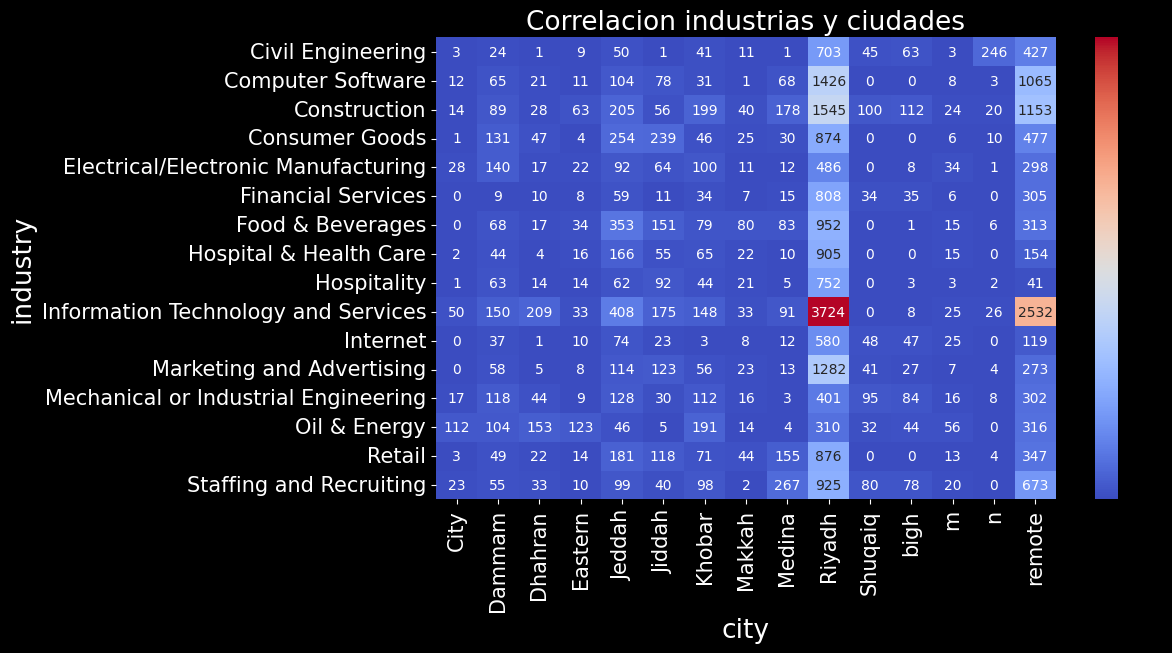

In [56]:
#Heatmap de correlacion entre ciudades e industrias
# Re formattear data
industrias_df = pd.melt(df, id_vars=['level', 'city'], value_vars=['industry_1', 'industry_2'], 
                        var_name='industry_source', value_name='industry')
industrias_df = industrias_df.dropna(subset=['industry'])

# Group by industria y ciudad 
industry_city_counts = industrias_df.groupby(['industry', 'city']).size().reset_index(name='count')

# Filtrar por top ciudades e industrias
filtered_counts = industry_city_counts[industry_city_counts['industry'].isin(top_15_industrias) & industry_city_counts['city'].isin(top_15_ciudades )]

# Crear pivot
industry_city_pivot = filtered_counts.pivot(index='industry', columns='city', values='count').fillna(0)

# Plot 
fig, ax = create_black_plot(title='Correlacion industrias y ciudades', xlabel='Trimestre', ylabel='Trabajos')
sns.heatmap(industry_city_pivot, cmap='coolwarm', annot=True, fmt='.0f',ax=ax)
